<a href="https://colab.research.google.com/github/rzqynptr/Matematika-Diskrit-24083010042-Amelia/blob/main/PROJECT_MATDIS_KEL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"Representasi Relasi Antar Mahasiswa Fakultas Ilmu Komputer UPN Veteran Jawa Timur terhadap Genre Film dalam Bentuk Graf serta Visualisasi Jaringan Menggunakan Konsep Matematika Diskrit"**


**Kelompok 2 :**
1. Raveena Ayu Desember Suryoputri (24083010028)
2. Amelia Rizqyna Putri (24083010042)
3. Yuniar Rachmawati (24083010106)





Perkembangan industri perfilman sudah banyak menghasilkan berbagai macam genre yang mencerminkan keberagaman selera penonton. Di kalangan mahasiswa Fakultas Ilmu Komputer UPN Veteran Jawa Timur, perferensi terhadap genre film tentu menjadi salah satu faktor yang menghubungkan mereka untuk berinteraksi sehari-hari. Memahami pola kesamaan minat terhadap genre film bisa menggambarkan bagaimana mahasiswa membentuk lingkaran pertemanan dan membangun relasi berdasarkan hobi yang sama. Analisis terhadap pola relasi ini bisa dilakukan secara sistematis dengan pendekatan matematika diskrit, khususnya melalui teori graf yang bisa mempresentasikan hubungan antar individu secara visual dan terstruktur.


Teori graf merupakan cabang matematika diskrit yang merepresentasikan hubungan antar objek dengan menggunakan *Node* dan *Edge*. Dalam penelitian ini, setiap mahasiswa direpresentasikan sebagai *Node*, sedangkan kesamaan preferensi genre film digambarkan sebagai *Edge* yang menghubungkan mereka. Dari visualiasi jaringan graf ini, pola hubungan antar mahasiswa bisa diamati dengan lebih mudah, termasuk identifikasi kelompok yang memiliki minat serupa. Penelitian ini bertujuan mengaplikasikan konsep matematika diskrit untuk menganalisis dan memvisualisasikan jaringan relasi mahasiswa berdasarkan genre film, sehingga bisa memberikan pemahaman yang lebih baik tentang dinamika sosial di lingkungan Fakultas Ilmu Komputer UPN Veteran Jawa Timur.




In [ ]:
# Import library
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)

print("="*80)
print(" "*20 + "ANALISIS GRAF PREFERENSI GENRE FILM")
print(" "*10 + "Fakultas Ilmu Komputer UPN Veteran Jawa Timur")
print(" "*15 + "Menggunakan Konsep Matematika Diskrit")
print("="*80)

# ================================================================================
# 1. LOAD DAN PREPROCESSING DATA
# ================================================================================

print("\n" + "="*80)
print("TAHAP 1: LOAD DAN PREPROCESSING DATA")
print("="*80)

# Load data
df = pd.read_excel('KUISIONER MATDIS.xlsx')

print(f"\n✓ Data berhasil dimuat!")
print(f"  Total Responden: {len(df)} mahasiswa")
print(f"  Periode: {pd.to_datetime(df['Timestamp']).min().strftime('%d %b %Y')} - {pd.to_datetime(df['Timestamp']).max().strftime('%d %b %Y')}")

# Parsing genre (pakai koma sebagai pemisah)
def parse_genres(genre_string):
    """Fungsi untuk parsing string genre menjadi list"""
    if pd.isna(genre_string):
        return []
    return [g.strip() for g in str(genre_string).split(',')]

df['genres_list'] = df['Genre film apa yang anda sukai?'].apply(parse_genres)

# Hitung statistik dasar
all_genres = []
for genres in df['genres_list']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
avg_genres = np.mean([len(g) for g in df['genres_list']])

print(f"\n  Genre unik teridentifikasi: {len(genre_counts)} genre")
print(f"  Rata-rata genre per mahasiswa: {avg_genres:.2f}")


                    ANALISIS GRAF PREFERENSI GENRE FILM
          Fakultas Ilmu Komputer UPN Veteran Jawa Timur
               Menggunakan Konsep Matematika Diskrit

TAHAP 1: LOAD DAN PREPROCESSING DATA

✓ Data berhasil dimuat!
  Total Responden: 70 mahasiswa
  Periode: 18 Nov 2025 - 20 Nov 2025

  Genre unik teridentifikasi: 8 genre
  Rata-rata genre per mahasiswa: 3.97


**TAHAP 1: LOAD DAN PREPROCESSING DATA**

Data penelitian ini berhasil dikumpulkan dari 70 mahasiswa Fakultas Ilmu Komputer UPN Veteran Jawa Timur pada tanggal 18 hingga 20 November 2025. Hasil preprocessing mengidentifikasi 8 genre film unik dengan rata-rata setiap mahasiswa menyukai 3.97 genre, menunjukkan bahwa preferensi yang sangat beragam.

In [ ]:
# ================================================================================
# 2. ANALISIS DESKRIPTIF
# ================================================================================

print("\n" + "="*80)
print("TAHAP 2: ANALISIS DESKRIPTIF")
print("="*80)

# Distribusi Program Studi
print("\n📚 Distribusi Program Studi:")
prodi_dist = df['Program Studi'].value_counts()
for prodi, count in prodi_dist.items():
    print(f"   • {prodi:20s}: {count:2d} mahasiswa ({count/len(df)*100:5.1f}%)")

# Distribusi Angkatan
print("\n📅 Distribusi Angkatan:")
angkatan_dist = df['Angkatan'].value_counts().sort_index()
for angkatan, count in angkatan_dist.items():
    print(f"   • {angkatan}: {count:2d} mahasiswa ({count/len(df)*100:5.1f}%)")

# Distribusi Genre
print("\n🎭 Distribusi Genre Film:")
for genre, count in genre_counts.most_common():
    pct = count/len(df)*100
    bar = '█' * int(pct/2)
    print(f"   • {genre:25s}: {count:2d} ({pct:5.1f}%) {bar}")

# Frekuensi Menonton
print("\n🎬 Frekuensi Menonton per Minggu:")
freq_dist = df['Seberapa sering anda menonton film dalam 1 minggu?'].value_counts().sort_index()
for freq, count in freq_dist.items():
    print(f"   • {freq}x per minggu: {count:2d} mahasiswa ({count/len(df)*100:5.1f}%)")

# Platform
print("\n📱 Platform Menonton (Top 5):")
platform_dist = df['Platform utama yang anda gunakan untuk menonton film:'].value_counts().head(5)
for platform, count in platform_dist.items():
    print(f"   • {platform:20s}: {count:2d} mahasiswa ({count/len(df)*100:5.1f}%)")

# Pengaruh Sosial
print("\n👥 Pengaruh Teman terhadap Preferensi:")
influence_dist = df['Apakah preferensi film anda dipengaruhi teman?'].value_counts()
for inf, count in influence_dist.items():
    print(f"   • {inf:5s}: {count:2d} mahasiswa ({count/len(df)*100:5.1f}%)")


TAHAP 2: ANALISIS DESKRIPTIF

📚 Distribusi Program Studi:
   • Informatika         : 20 mahasiswa ( 28.6%)
   • Sains Data          : 20 mahasiswa ( 28.6%)
   • Sistem Informasi    : 20 mahasiswa ( 28.6%)
   • Bisnis Digital      : 10 mahasiswa ( 14.3%)

📅 Distribusi Angkatan:
   • 2023: 10 mahasiswa ( 14.3%)
   • 2024: 37 mahasiswa ( 52.9%)
   • 2025: 23 mahasiswa ( 32.9%)

🎭 Distribusi Genre Film:
   • Comedy                   : 50 ( 71.4%) ███████████████████████████████████
   • Fantasy                  : 41 ( 58.6%) █████████████████████████████
   • Action                   : 41 ( 58.6%) █████████████████████████████
   • Romance                  : 36 ( 51.4%) █████████████████████████
   • Horror                   : 33 ( 47.1%) ███████████████████████
   • Thriller                 : 30 ( 42.9%) █████████████████████
   • Drama                    : 26 ( 37.1%) ██████████████████
   • Sci-fi (Science Fiction) : 21 ( 30.0%) ███████████████

🎬 Frekuensi Menonton per Minggu:
   • 1x

**TAHAP 2: ANALISIS DESKRIPTIF**

Hasil analisis deskriptif kami menunjukkan bahwa genre Comedy menempati posisi teratas dengan 71,4% mahasiswa menyukainya, jauh meninggalkan genre lainnya. Kami juga menemukan bahwa Fantasy dan Action hampir sama populernya dengan masing-masing 58,6% responden, sedangkan genre Sci-Fi menjadi pilihan paling rendah dengan hanya 30% mahasiswa.


Dari perspektif platform, Netflix menjadi pilihan utama dengan 58,6% mahasiswa menggunakannya, disusul YouTube sebagai alternatif gratis (17,1%) dan Bioskop tradisional (10%). Perilaku menonton mahasiswa tergolong aktif, di mana 91,4% dari mereka menonton film 2–5 kali per minggu, menandakan konsumsi media digital yang cukup tinggi.


Aspek sosial juga menjadi faktor penting dalam penelitian ini. Kami menemukan bahwa 52,9% mahasiswa terpengaruh rekomendasi teman dalam memilih genre film, sementara 47,1% lainnya membuat pilihan secara independen. Adapun distribusi responden seimbang di empat program studi utama, meskipun mayoritas berasal dari angkatan 2024 (52,9%), diikuti angkatan 2025 (32,9%), dan angkatan 2023 (14,3%).


TAHAP 3: VISUALISASI DISTRIBUSI DATA

✓ Visualisasi distribusi disimpan: 01_analisis_deskriptif.png


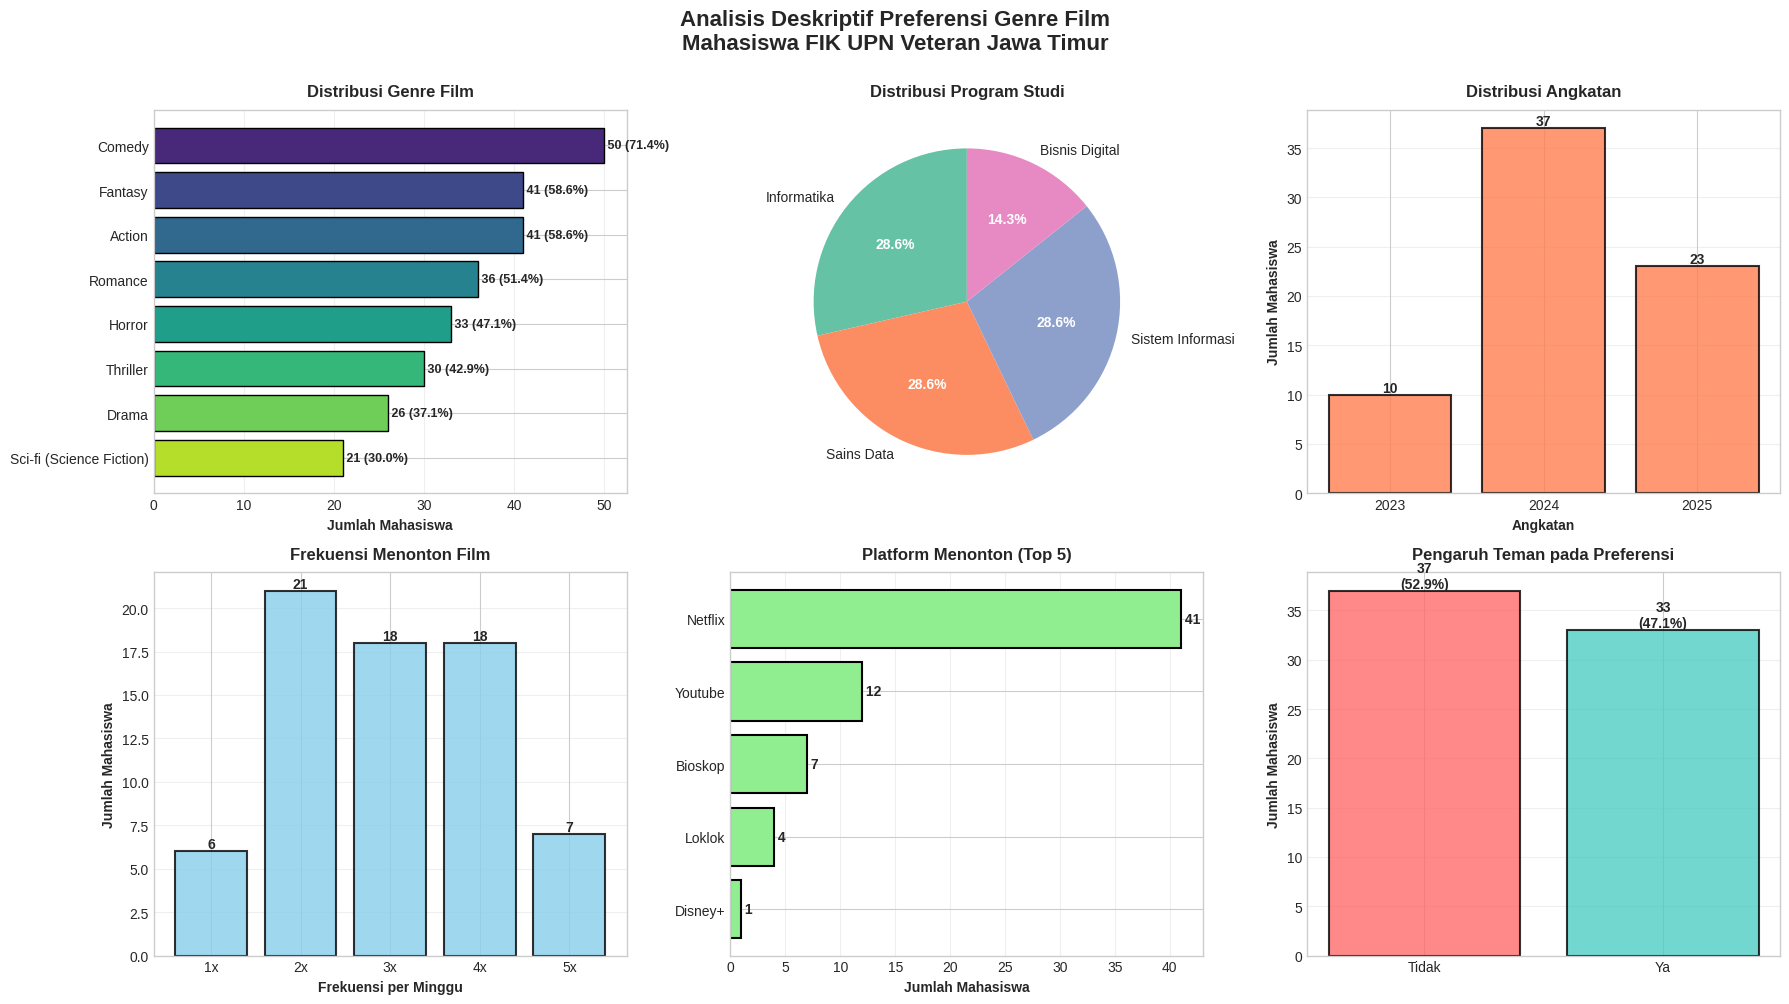

In [ ]:
# ================================================================================
# 3. VISUALISASI DISTRIBUSI DATA
# ================================================================================

print("\n" + "="*80)
print("TAHAP 3: VISUALISASI DISTRIBUSI DATA")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Analisis Deskriptif Preferensi Genre Film\nMahasiswa FIK UPN Veteran Jawa Timur',
             fontsize=16, fontweight='bold', y=1.00)

# 1. Distribusi Genre
ax1 = axes[0, 0]
genres = [g[0] for g in genre_counts.most_common()]
counts = [g[1] for g in genre_counts.most_common()]
colors = sns.color_palette("viridis", len(genres))
bars = ax1.barh(genres, counts, color=colors, edgecolor='black', linewidth=1)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f' {int(width)} ({counts[i]/len(df)*100:.1f}%)',
             ha='left', va='center', fontsize=9, fontweight='bold')
ax1.set_xlabel('Jumlah Mahasiswa', fontweight='bold')
ax1.set_title('Distribusi Genre Film', fontweight='bold', pad=10)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# 2. Distribusi Program Studi
ax2 = axes[0, 1]
prodi_names = prodi_dist.index.tolist()
prodi_values = prodi_dist.values.tolist()
colors_prodi = sns.color_palette("Set2", len(prodi_names))
wedges, texts, autotexts = ax2.pie(prodi_values, labels=prodi_names, autopct='%1.1f%%',
                                    colors=colors_prodi, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
ax2.set_title('Distribusi Program Studi', fontweight='bold', pad=10)

# 3. Distribusi Angkatan
ax3 = axes[0, 2]
angkatan_labels = [str(x) for x in angkatan_dist.index]
ax3.bar(angkatan_labels, angkatan_dist.values, color='coral', edgecolor='black', linewidth=1.5, alpha=0.8)
for i, v in enumerate(angkatan_dist.values):
    ax3.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
ax3.set_xlabel('Angkatan', fontweight='bold')
ax3.set_ylabel('Jumlah Mahasiswa', fontweight='bold')
ax3.set_title('Distribusi Angkatan', fontweight='bold', pad=10)
ax3.grid(axis='y', alpha=0.3)

# 4. Frekuensi Menonton
ax4 = axes[1, 0]
freq_labels = [f'{x}x' for x in freq_dist.index]
ax4.bar(freq_labels, freq_dist.values, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.8)
for i, v in enumerate(freq_dist.values):
    ax4.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
ax4.set_xlabel('Frekuensi per Minggu', fontweight='bold')
ax4.set_ylabel('Jumlah Mahasiswa', fontweight='bold')
ax4.set_title('Frekuensi Menonton Film', fontweight='bold', pad=10)
ax4.grid(axis='y', alpha=0.3)

# 5. Platform Menonton
ax5 = axes[1, 1]
platform_top5 = platform_dist.head(5)
ax5.barh(platform_top5.index, platform_top5.values, color='lightgreen', edgecolor='black', linewidth=1.5)
for i, v in enumerate(platform_top5.values):
    ax5.text(v, i, f' {v}', ha='left', va='center', fontweight='bold')
ax5.set_xlabel('Jumlah Mahasiswa', fontweight='bold')
ax5.set_title('Platform Menonton (Top 5)', fontweight='bold', pad=10)
ax5.grid(axis='x', alpha=0.3)
ax5.invert_yaxis()

# 6. Pengaruh Teman
ax6 = axes[1, 2]
influence_labels = influence_dist.index.tolist()
influence_values = influence_dist.values.tolist()
colors_inf = ['#ff6b6b', '#4ecdc4']
bars = ax6.bar(influence_labels, influence_values, color=colors_inf, edgecolor='black', linewidth=1.5, alpha=0.8)
for i, v in enumerate(influence_values):
    ax6.text(i, v, f'{v}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')
ax6.set_ylabel('Jumlah Mahasiswa', fontweight='bold')
ax6.set_title('Pengaruh Teman pada Preferensi', fontweight='bold', pad=10)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('01_analisis_deskriptif.png', bbox_inches='tight', facecolor='white')
print("\n✓ Visualisasi distribusi disimpan: 01_analisis_deskriptif.png")
plt.show()


**TAHAP 3: VISUALISASI DISTRIBUSI DATA**

Visualisasi data yang kami buat mengkonfirmasi preferensi genre menurun secara bertahap dari Comedy hingga Sci-Fi tanpa adanya lompatan signifikan. Pola frekuensi menonton membentuk distribusi yang hampir normal dengan puncak pada kategori 2–4 kali per minggu, membuktikan bahwa perilaku menonton mahasiswa cukup konsisten.


Platform streaming dalam visualisasi kami menampilkan dominansi Netflix yang jelas dengan bar yang jauh lebih panjang dibandingkan platform lainnya, mencerminkan penguasaan Netflix dalam ekosistem digital lokal. Sementara itu, distribusi pengaruh teman hampir seimbang, namun tetap sedikit menguntungkan kategori "ya" dengan selisih 5,8%, menunjukkan bahwa pengaruh sosial memang berperan dalam keputusan menonton film.

In [ ]:
# ================================================================================
# 4. KONSTRUKSI GRAF BIPARTIT (MAHASISWA - GENRE)
# ================================================================================

print("\n" + "="*80)
print("TAHAP 4: KONSTRUKSI GRAF BIPARTIT")
print("="*80)

mahasiswa_nodes = df['Nama'].tolist()
genre_nodes = list(genre_counts.keys())

# Buat graf bipartit
B = nx.Graph()
B.add_nodes_from(mahasiswa_nodes, bipartite=0, node_type='mahasiswa')
B.add_nodes_from(genre_nodes, bipartite=1, node_type='genre')

# Tambahkan edges (mahasiswa ke genre yang mereka sukai)
edge_list = []
for idx, row in df.iterrows():
    mahasiswa = row['Nama']
    genres = row['genres_list']
    for genre in genres:
        B.add_edge(mahasiswa, genre)
        edge_list.append((mahasiswa, genre))

print(f"\n🔗 Graf Bipartit G = (V, E):")
print(f"   V (Vertices):\n      • Mahasiswa (V₁): {len(mahasiswa_nodes)} nodes\n      • Genre (V₂): {len(genre_nodes)} nodes\n      • Total |V|: {B.number_of_nodes()} nodes")
print(f"   E (Edges): {B.number_of_edges()} edges")
print(f"   Density: {nx.density(B):.4f}")
print(f"   Average Degree: {sum(dict(B.degree()).values())/B.number_of_nodes():.2f}")

# Degree distribution untuk genre
print(f"\n📊 Degree Centrality Genre (Popularitas):")
genre_degrees = {node: B.degree(node) for node in genre_nodes}
sorted_genres = sorted(genre_degrees.items(), key=lambda x: x[1], reverse=True)
for genre, degree in sorted_genres:
    print(f"   • {genre:25s}: degree = {degree:2d} ({degree/len(mahasiswa_nodes)*100:5.1f}%)")


TAHAP 4: KONSTRUKSI GRAF BIPARTIT

🔗 Graf Bipartit G = (V, E):
   V (Vertices):
      • Mahasiswa (V₁): 70 nodes
      • Genre (V₂): 8 nodes
      • Total |V|: 78 nodes
   E (Edges): 278 edges
   Density: 0.0926
   Average Degree: 7.13

📊 Degree Centrality Genre (Popularitas):
   • Comedy                   : degree = 50 ( 71.4%)
   • Fantasy                  : degree = 41 ( 58.6%)
   • Action                   : degree = 41 ( 58.6%)
   • Romance                  : degree = 36 ( 51.4%)
   • Horror                   : degree = 33 ( 47.1%)
   • Thriller                 : degree = 30 ( 42.9%)
   • Drama                    : degree = 26 ( 37.1%)
   • Sci-fi (Science Fiction) : degree = 21 ( 30.0%)


**TAHAP 4: KONSTRUKSI GRAF BIPARTIT**

Untuk melihat hubungan antara mahasiswa dan genre film, kami membangun graf bipartit yang terdiri dari 70 node mahasiswa dan 8 node genre, total 78 node dengan 278 edge sebagai representasi preferensi. Graf ini memiliki density sebesar 0,0926, menunjukkan struktur yang sparse—mahasiswa hanya terhubung pada beberapa genre tertentu, bukan ke semua genre yang tersedia.

Average degree graf adalah 7,13, artinya setiap node memiliki sekitar 7–8 koneksi. Analisis degree centrality pada node genre menegaskan hasil deskriptif sebelumnya: Comedy memiliki koneksi terbanyak (50), disusul Fantasy dan Action (41), kemudian Romance, Horror, Thriller, Drama, dan Sci-Fi. Konsistensi ini menunjukkan bahwa data stabil dan pola preferensi mahasiswa memang terfokus pada genre-genre tertentu, bukan tersebar merata.

In [ ]:
# ================================================================================
# 5. KONSTRUKSI GRAF PROYEKSI MAHASISWA
# ================================================================================

print("\n" + "="*80)
print("TAHAP 5: KONSTRUKSI GRAF PROYEKSI MAHASISWA")
print("="*80)

# Buat graf proyeksi mahasiswa
# Dua mahasiswa terhubung jika mereka punya minimal 1 genre yang sama
G_mahasiswa = nx.Graph()
G_mahasiswa.add_nodes_from(mahasiswa_nodes)

# Tambahkan atribut ke setiap node
for idx, row in df.iterrows():
    nama = row['Nama']
    G_mahasiswa.nodes[nama]['prodi'] = row['Program Studi']
    G_mahasiswa.nodes[nama]['angkatan'] = row['Angkatan']
    G_mahasiswa.nodes[nama]['genres'] = row['genres_list']
    G_mahasiswa.nodes[nama]['frekuensi'] = row['Seberapa sering anda menonton film dalam 1 minggu?']
    G_mahasiswa.nodes[nama]['platform'] = row['Platform utama yang anda gunakan untuk menonton film:']

# Hitung kesamaan genre (Jaccard Similarity)
print("\n⏳ Menghitung kesamaan genre antar mahasiswa...")
edge_count = 0
for i, mhs1 in enumerate(mahasiswa_nodes):
    genres1 = set(df[df['Nama'] == mhs1]['genres_list'].iloc[0])
    for j, mhs2 in enumerate(mahasiswa_nodes):
        if i < j:
            genres2 = set(df[df['Nama'] == mhs2]['genres_list'].iloc[0])
            common_genres = genres1.intersection(genres2)

            if len(common_genres) > 0:
                # Bobot = jumlah genre yang sama
                weight = len(common_genres)

                # Jaccard Similarity = |A ∩ B| / |A ∪ B|
                union_genres = genres1.union(genres2)
                jaccard_sim = len(common_genres) / len(union_genres)

                G_mahasiswa.add_edge(mhs1, mhs2,
                                    weight=weight,
                                    common_genres=list(common_genres),
                                    jaccard_similarity=jaccard_sim)
                edge_count += 1

print(f"\n🔗 Graf Proyeksi Mahasiswa G' = (V', E'):")
print(f"   V' (Vertices): {G_mahasiswa.number_of_nodes()} mahasiswa")
print(f"   E' (Edges): {G_mahasiswa.number_of_edges()} koneksi")
print(f"   Density: {nx.density(G_mahasiswa):.4f}")
print(f"   Is Connected: {nx.is_connected(G_mahasiswa)}")

if not nx.is_connected(G_mahasiswa):
    components = list(nx.connected_components(G_mahasiswa))
    print(f"   Connected Components: {len(components)}")
    largest = max(components, key=len)
    print(f"   Largest Component: {len(largest)} nodes ({len(largest)/len(mahasiswa_nodes)*100:.1f}%)")


TAHAP 5: KONSTRUKSI GRAF PROYEKSI MAHASISWA

⏳ Menghitung kesamaan genre antar mahasiswa...

🔗 Graf Proyeksi Mahasiswa G' = (V', E'):
   V' (Vertices): 70 mahasiswa
   E' (Edges): 2150 koneksi
   Density: 0.8903
   Is Connected: True


**TAHAP 5: KONSTRUKSI GRAF PROYEKSI MAHASISWA**


Proyeksi graf dilakukan dengan menghubungkan mahasiswa berdasarkan genre film yang mereka sama-sama sukai. Pada tahap ini, layer genre disembunyikan dan hanya node mahasiswa yang dipertahankan. Dua mahasiswa dianggap terhubung jika berbagi minimal satu genre favorit.

Hasil proyeksi menunjukkan perubahan besar dibandingkan graf bipartit. Jaringan kini berisi 70 simpul mahasiswa dengan 2.150 edge—peningkatan tajam dari 278 edge sebelumnya. Density graf mencapai 0,8903, menandakan struktur yang sangat padat; hampir semua mahasiswa memiliki persinggungan preferensi dengan yang lainnya.

Graf proyeksi ini juga “fully connected”, yang berarti seluruh mahasiswa berada dalam satu komponen besar tanpa ada yang terisolasi. Kondisi ini memperlihatkan bahwa arus informasi terkait film atau genre dapat menyebar dengan sangat efektif ke seluruh jaringan mahasiswa karena adanya keterhubungan preferensi yang hampir merata.

In [ ]:
# ================================================================================
# 6. METRIK SENTRALITAS (CENTRALITY MEASURES)
# ================================================================================

print("\n" + "="*80)
print("TAHAP 6: ANALISIS METRIK SENTRALITAS")
print("="*80)

print("\n⏳ Menghitung metrik sentralitas...")

# Degree Centrality
degree_centrality = nx.degree_centrality(G_mahasiswa)
print(f"   ✓ Degree Centrality")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_mahasiswa)
print(f"   ✓ Betweenness Centrality")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_mahasiswa)
print(f"   ✓ Closeness Centrality")

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G_mahasiswa, max_iter=1000, tol=1e-06)
print(f"   ✓ Eigenvector Centrality")

# Clustering Coefficient
clustering_coef = nx.clustering(G_mahasiswa)
print(f"   ✓ Clustering Coefficient")

# Calculate Average Clustering Coefficient
avg_clustering = nx.average_clustering(G_mahasiswa)

print(f"\n📊 Statistik Graf:")
print(f"   • Average Degree: {sum(dict(G_mahasiswa.degree()).values())/G_mahasiswa.number_of_nodes():.2f}")
print(f"   • Average Clustering Coefficient: {avg_clustering:.4f}")
print(f"   • Diameter: {nx.diameter(G_mahasiswa) if nx.is_connected(G_mahasiswa) else 'N/A (not connected)'}")
print(f"   • Average Shortest Path: {nx.average_shortest_path_length(G_mahasiswa) if nx.is_connected(G_mahasiswa) else 'N/A':.4f}" if nx.is_connected(G_mahasiswa) else "   • Average Shortest Path: N/A (not connected)")

# Top mahasiswa berdasarkan metrik
print(f"\n🎯 Top 10 Mahasiswa - Degree Centrality (Konektivitas):")
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for i, (node, centrality) in enumerate(sorted_degree, 1):
    prodi = G_mahasiswa.nodes[node]['prodi']
    genres = ', '.join(G_mahasiswa.nodes[node]['genres'][:3])
    print(f"   {i:2d}. {node:30s} ({prodi:15s}) DC={centrality:.4f} | {genres}...")


TAHAP 6: ANALISIS METRIK SENTRALITAS

⏳ Menghitung metrik sentralitas...
   ✓ Degree Centrality

📊 Statistik Graf:
   • Average Degree: 61.43
   • Average Clustering Coefficient: 0.9262
   • Diameter: 2
   • Average Shortest Path: 1.1097

🎯 Top 10 Mahasiswa - Degree Centrality (Konektivitas):
    1. Dimas Alvino                   (Informatika    ) DC=1.0000 | Comedy, Horror, Thriller...
    2. Faydzaki Ananta Putra          (Informatika    ) DC=1.0000 | Comedy, Horror, Romance...
    3. Okvivi Fatrisia Manurung       (Informatika    ) DC=1.0000 | Comedy, Romance, Thriller...
    4. Aulia Ulina Simamora           (Informatika    ) DC=1.0000 | Comedy, Horror, Romance...
    5. Ezra                           (Informatika    ) DC=1.0000 | Comedy, Horror, Romance...
    6. badii ul choir al irsyad       (Informatika    ) DC=1.0000 | Comedy, Horror, Romance...
    7. Saif ali zaky ashiblie         (Sains Data     ) DC=1.0000 | Comedy, Horror, Thriller...
    8. Nerissabila U I              

**TAHAP 6: ANALISIS METRIK SENTRALITAS**

Pada tahap ini, analisis metrik sentralitas bertujuan untuk mengetahui seberapa “terhubung” masing-masing mahasiswa di dalam jaringan berdasarkan preferensi genre film mereka. Nilai degree centrality (DC) yang tinggi dapat dilihat seluruh 10 mahasiswa teratas memiliki DC=1.0000 ini menandakan bahwa mereka terkoneksi langsung dengan hampir seluruh mahasiswa lain. Ini berarti, mahasiswa-mahasiswa ini memiliki preferensi genre yang populer dan mudah ditemukan kesamaannya dengan banyak orang.

Dengan rata-rata degree mencapai lebih dari 61 dan nilai average shortest path yang rendah (1.10), jaringan tergolong sangat rapat dan efisien; hampir setiap mahasiswa bisa saling terhubung melalui satu “langkah” saja. Nilai sentralitas seperti ini juga menandakan adanya kelompok mahasiswa yang cukup inklusif, tanpa banyak pembatas sosial berbasis preferensi film.

In [ ]:
# ================================================================================
# 7. COMMUNITY DETECTION (DETEKSI KOMUNITAS)
# ================================================================================

print("\n" + "="*80)
print("TAHAP 7: DETEKSI KOMUNITAS")
print("="*80)

from networkx.algorithms import community

# Deteksi komunitas menggunakan Greedy Modularity
print("\n⏳ Menjalankan algoritma Greedy Modularity Communities...")

if nx.is_connected(G_mahasiswa):
    communities = list(community.greedy_modularity_communities(G_mahasiswa))
    modularity = community.modularity(G_mahasiswa, communities)
else:
    # Gunakan komponen terbesar
    largest_cc = max(nx.connected_components(G_mahasiswa), key=len)
    G_largest = G_mahasiswa.subgraph(largest_cc).copy()
    communities = list(community.greedy_modularity_communities(G_largest))
    modularity = community.modularity(G_largest, communities)

print(f"\n✓ Deteksi komunitas selesai!")
print(f"   • Jumlah Komunitas: {len(communities)}")
print(f"   • Modularity Score: {modularity:.4f}")

# Mapping node ke komunitas
node_to_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_community[node] = i

# Analisis setiap komunitas
community_data = []
for i, comm in enumerate(communities, 1):
    print(f"\n📌 Komunitas {i}:")
    print(f"   • Jumlah anggota: {len(comm)} mahasiswa ({len(comm)/len(mahasiswa_nodes)*100:.1f}%)")

    # Genre dominan
    comm_genres = []
    comm_prodi = []
    comm_angkatan = []

    for node in comm:
        if node in G_mahasiswa.nodes():
            comm_genres.extend(G_mahasiswa.nodes[node]['genres'])
            comm_prodi.append(G_mahasiswa.nodes[node]['prodi'])
            comm_angkatan.append(G_mahasiswa.nodes[node]['angkatan'])

    genre_counter = Counter(comm_genres)
    prodi_counter = Counter(comm_prodi)
    angkatan_counter = Counter(comm_angkatan)

    print(f"   • Genre dominan: {', '.join([f'{g}({c})' for g, c in genre_counter.most_common(3)])}")
    print(f"   • Prodi dominan: {', '.join([f'{p}({c})' for p, c in prodi_counter.most_common(2)])}")
    print(f"   • Angkatan dominan: {', '.join([f'{a}({c})' for a, c in angkatan_counter.most_common(2)])}")

    community_data.append({
        'Komunitas': i,
        'Jumlah': len(comm),
        'Genre_Utama': genre_counter.most_common(1)[0][0] if genre_counter else 'N/A'
    })


TAHAP 7: DETEKSI KOMUNITAS

⏳ Menjalankan algoritma Greedy Modularity Communities...

✓ Deteksi komunitas selesai!
   • Jumlah Komunitas: 3
   • Modularity Score: 0.0334

📌 Komunitas 1:
   • Jumlah anggota: 33 mahasiswa (47.1%)
   • Genre dominan: Thriller(27), Comedy(22), Romance(21)
   • Prodi dominan: Sistem Informasi(11), Informatika(10)
   • Angkatan dominan: 2024(19), 2025(9)

📌 Komunitas 2:
   • Jumlah anggota: 24 mahasiswa (34.3%)
   • Genre dominan: Fantasy(24), Comedy(15), Action(14)
   • Prodi dominan: Sains Data(9), Informatika(6)
   • Angkatan dominan: 2024(13), 2025(7)

📌 Komunitas 3:
   • Jumlah anggota: 13 mahasiswa (18.6%)
   • Genre dominan: Comedy(13), Action(9), Sci-fi (Science Fiction)(6)
   • Prodi dominan: Sistem Informasi(5), Informatika(4)
   • Angkatan dominan: 2025(7), 2024(5)


**TAHAP 7: DETEKSI KOMUNITAS**

Tahap deteksi komunitas menggunakan algoritma modularity untuk memetakan kelompok (komunitas) mahasiswa yang memiliki kemiripan preferensi genre. Teridentifikasi tiga komunitas utama, meskipun nilai modularity relatif kecil (sekitar 0.03), yang menandakan struktur komunitas tidak terlalu tegas atau tidak terlalu terpisah. Komunitas terbesar didominasi mahasiswa Sistem Informasi dan Informatika dengan genre utama Thriller, Comedy, dan Romance.


Komunitas kedua didominasi mahasiswa Sains Data dengan minat utama pada Fantasy, Comedy, dan Action, sedangkan komunitas ketiga lebih kecil dan tersebar dengan minat utama pada Comedy, Action, dan Science Fiction. Hasil ini mengindikasikan bahwa, meski kelompok minat memang terbentuk, preferensi antar mahasiswa masih saling tumpang tindih sehingga batas antarkomunitas tidak begitu tajam.



TAHAP 8: VISUALISASI GRAF JARINGAN MAHASISWA

📊 Membuat visualisasi graf (subset 40 mahasiswa teratas)...
   ⏳ Menghitung layout (spring layout)...
   ⏳ Menggambar edges...
   ⏳ Menggambar nodes...

✓ Graf mahasiswa disimpan: 02_graf_mahasiswa_network.png


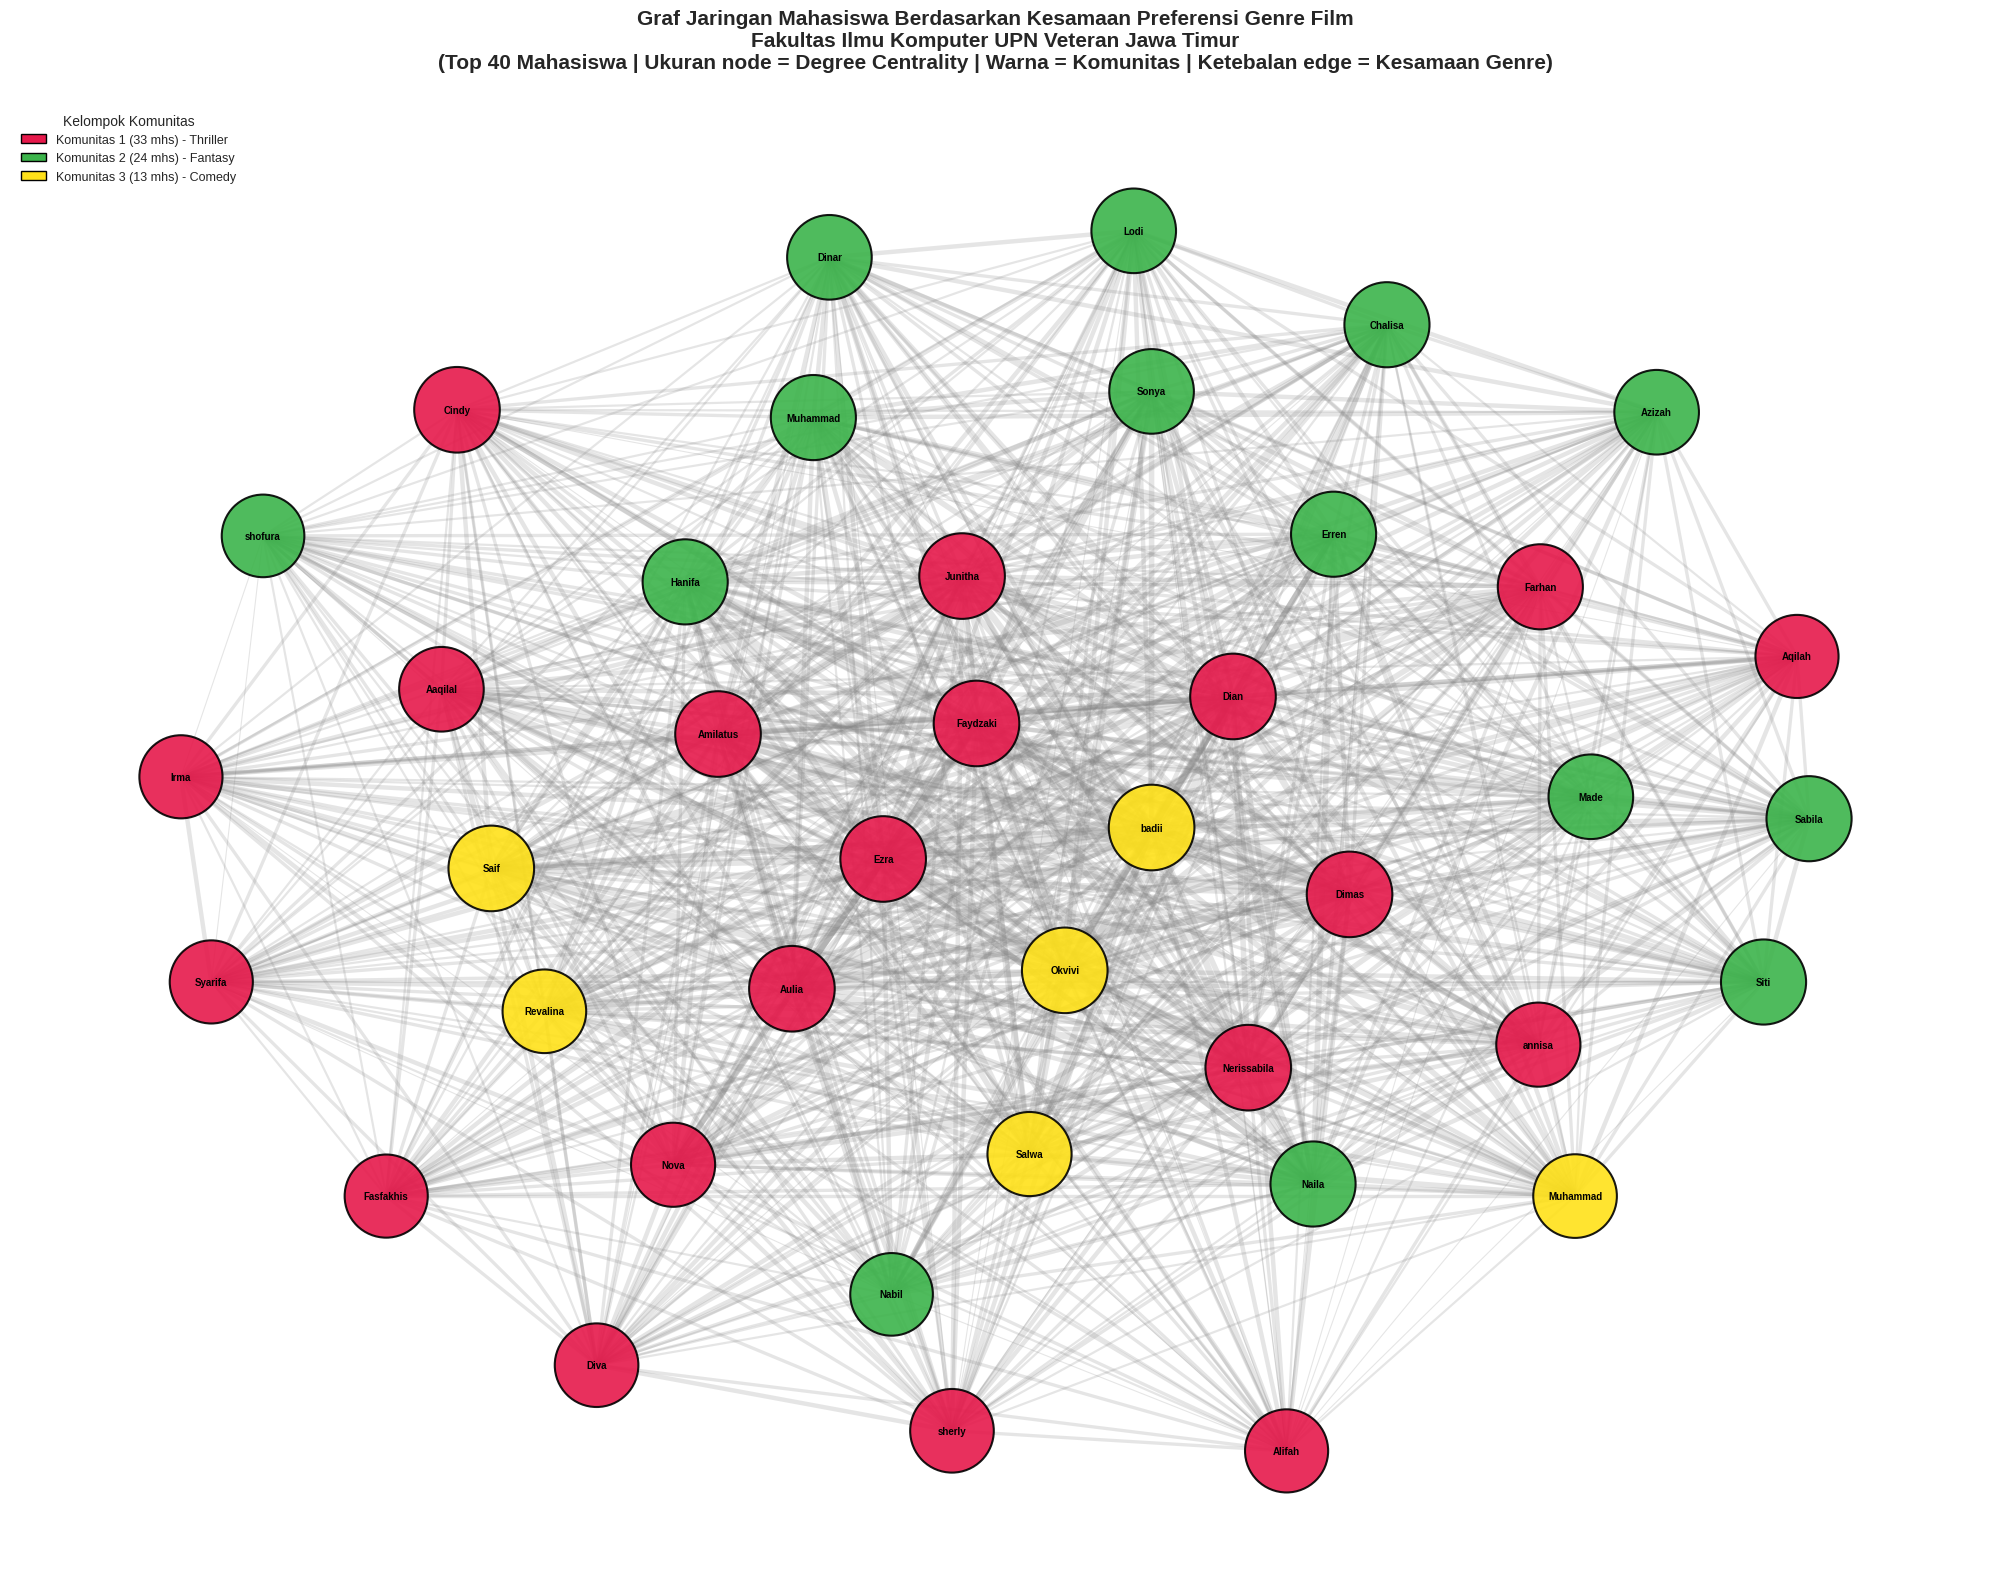

In [ ]:
# ================================================================================
# 8. VISUALISASI GRAF MAHASISWA
# ================================================================================

print("\n" + "="*80)
print("TAHAP 8: VISUALISASI GRAF JARINGAN MAHASISWA")
print("="*80)

# Ambil subset untuk visualisasi yang lebih jelas (top 40 mahasiswa)
top_n = min(40, len(G_mahasiswa.nodes()))
top_nodes_list = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_node_names = [node[0] for node in top_nodes_list]
G_subset = G_mahasiswa.subgraph(top_node_names).copy()

print(f"\n📊 Membuat visualisasi graf (subset {top_n} mahasiswa teratas)...")

fig, ax = plt.subplots(1, 1, figsize=(20, 16))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f8f8f8')

# Layout menggunakan Spring Layout (Force-Directed)
print("   ⏳ Menghitung layout (spring layout)...")
pos = nx.spring_layout(G_subset, k=2.5, iterations=100, seed=42)

# Warna berdasarkan komunitas
community_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

node_colors = []
for node in G_subset.nodes():
    if node in node_to_community:
        comm_idx = node_to_community[node]
        node_colors.append(community_colors[comm_idx % len(community_colors)])
    else:
        node_colors.append('#cccccc')

# Node sizes berdasarkan degree centrality
node_sizes = [800 + (degree_centrality[node] * 3000) for node in G_subset.nodes()]

# Edge widths berdasarkan bobot
edges = G_subset.edges()
weights = [G_subset[u][v]['weight'] * 0.8 for u, v in edges]

# Draw edges
print("   ⏳ Menggambar edges...")
nx.draw_networkx_edges(G_subset, pos, width=weights, alpha=0.2,
                       edge_color='gray', ax=ax)

# Draw nodes
print("   ⏳ Menggambar nodes...")
nx.draw_networkx_nodes(G_subset, pos, node_color=node_colors,
                       node_size=node_sizes, alpha=0.9,
                       edgecolors='black', linewidths=1.5, ax=ax)

# Draw labels (nama depan saja)
labels = {node: node.split()[0] if len(node.split()) > 0 else node for node in G_subset.nodes()}
nx.draw_networkx_labels(G_subset, pos, labels, font_size=7, font_weight='bold', ax=ax)

# Title dan legend
title_text = 'Graf Jaringan Mahasiswa Berdasarkan Kesamaan Preferensi Genre Film\n'
title_text += 'Fakultas Ilmu Komputer UPN Veteran Jawa Timur\n'
title_text += f'(Top {top_n} Mahasiswa | Ukuran node = Degree Centrality | Warna = Komunitas | Ketebalan edge = Kesamaan Genre)'
ax.set_title(title_text, fontsize=15, fontweight='bold', pad=25)

# Legend
from matplotlib.patches import Patch
legend_elements = []
for i in range(len(communities)):
    if i < len(community_data):
        label = f"Komunitas {i+1} ({community_data[i]['Jumlah']} mhs) - {community_data[i]['Genre_Utama']}"
        color = community_colors[i % len(community_colors)]
        legend_elements.append(Patch(facecolor=color, edgecolor='black', label=label))

ax.legend(handles=legend_elements, loc='upper left', fontsize=9,
         framealpha=0.95, title='Kelompok Komunitas', title_fontsize=10)

ax.axis('off')
plt.tight_layout()
plt.savefig('02_graf_mahasiswa_network.png', bbox_inches='tight', facecolor='white')
print("\n✓ Graf mahasiswa disimpan: 02_graf_mahasiswa_network.png")
plt.show()

**TAHAP 8: VISUALISASI GRAF JARINGAN MAHASISWA**

Visualisasi ini menggambarkan secara nyata struktur dan kepadatan jaringan pertemanan atau relasi berdasarkan kesamaan genre film. Node (simpul) mewakili mahasiswa, ukuran node menandakan tingkat sentralitasnya, dan warna node membedakan komunitas. Sisi-sisi yang padat menghubungkan hampir seluruh node, memperjelas bahwa banyak mahasiswa saling terkait secara langsung berdasarkan preferensi genre. Tiga warna berbeda pada graf memudahkan dalam mengidentifikasi komunitas. Namun dikarenakan kepadatan graf sangat tinggi, terlihat bahwa garis pemisah antarkomunitas tetap samar—masing-masing mahasiswa masih banyak terkoneksi lintas grup.


TAHAP 9: GRAF PROYEKSI GENRE

⏳ Membangun graf proyeksi genre...

🔗 Graf Proyeksi Genre G'' = (V'', E''):
   V'' (Vertices): 8 genre
   E'' (Edges): 28 ko-preferensi
   Density: 1.0000

🔗 Top 10 Pasangan Genre dengan Ko-preferensi Tertinggi:
    1. Comedy                    — Action                   : 33 mahasiswa
    2. Comedy                    — Romance                  : 30 mahasiswa
    3. Fantasy                   — Comedy                   : 29 mahasiswa
    4. Fantasy                   — Action                   : 27 mahasiswa
    5. Comedy                    — Thriller                 : 23 mahasiswa
    6. Comedy                    — Horror                   : 23 mahasiswa
    7. Drama                     — Comedy                   : 22 mahasiswa
    8. Drama                     — Romance                  : 21 mahasiswa
    9. Action                    — Horror                   : 21 mahasiswa
   10. Fantasy                   — Romance                  : 20 mahasiswa

✓ Graf

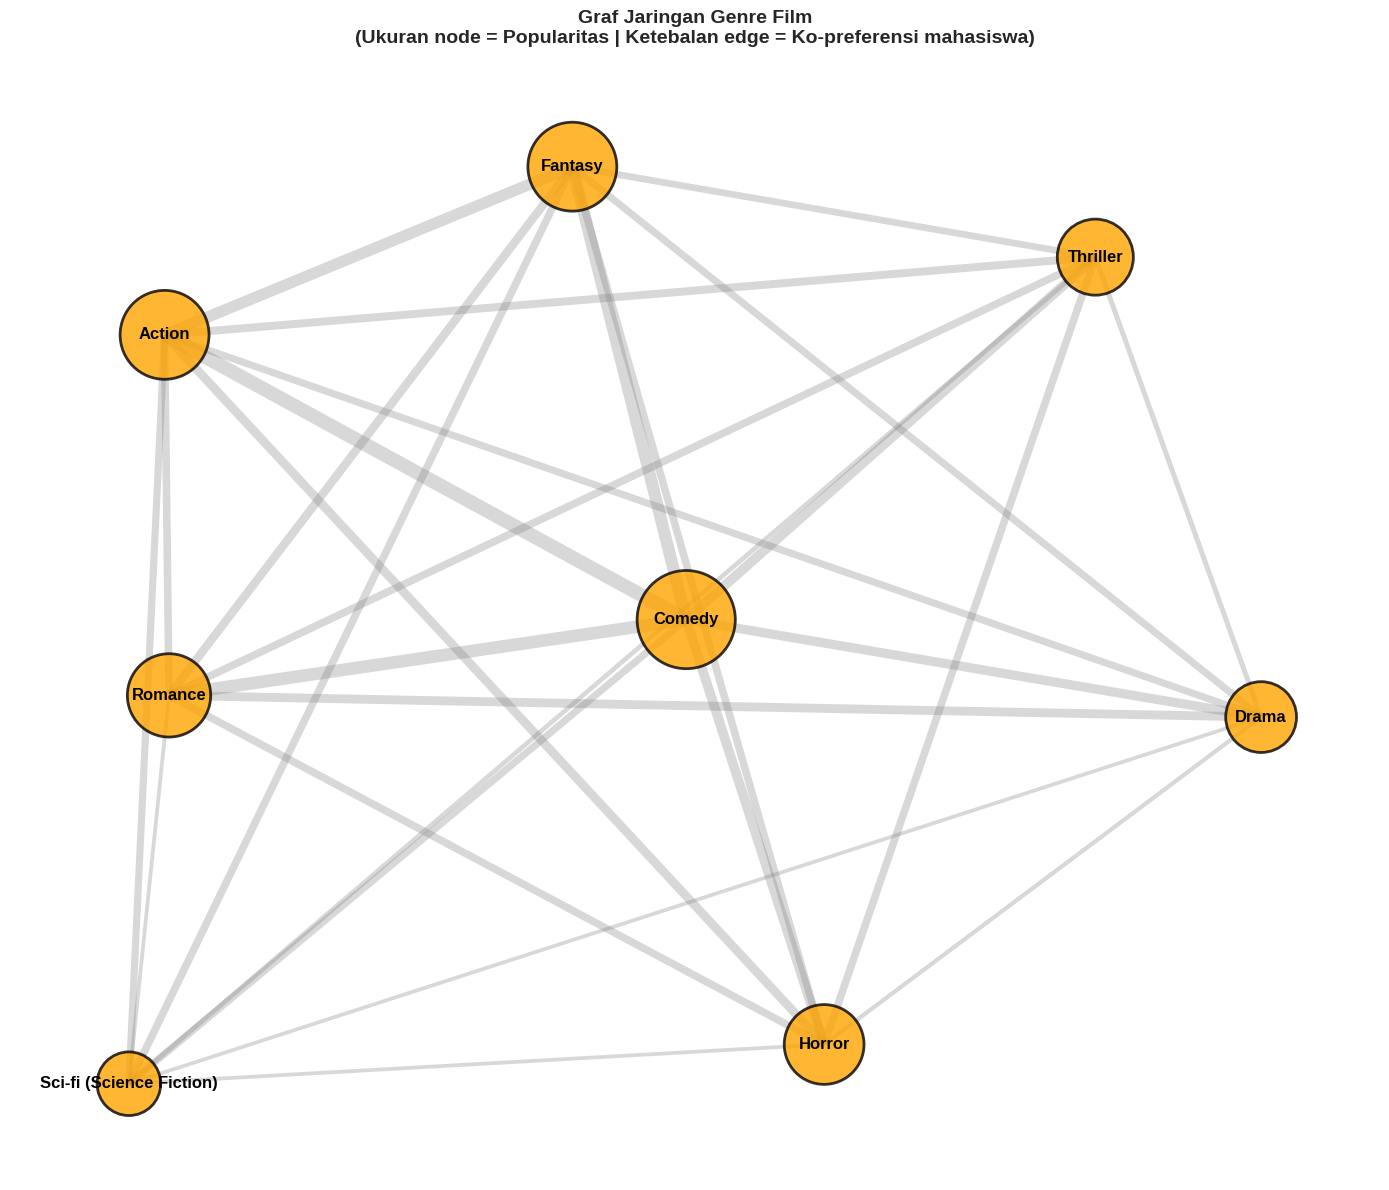

In [ ]:
# ================================================================================
# 9. GRAF PROYEKSI GENRE
# ================================================================================

print("\n" + "="*80)
print("TAHAP 9: GRAF PROYEKSI GENRE")
print("="*80)

# Buat graf proyeksi genre
# Dua genre terhubung jika ada mahasiswa yang menyukai keduanya
G_genre = nx.Graph()
G_genre.add_nodes_from(genre_nodes)

print("\n⏳ Membangun graf proyeksi genre...")
for idx, row in df.iterrows():
    genres = row['genres_list']
    # Hubungkan setiap pasangan genre yang dipilih mahasiswa yang sama
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            if G_genre.has_edge(genres[i], genres[j]):
                G_genre[genres[i]][genres[j]]['weight'] += 1
            else:
                G_genre.add_edge(genres[i], genres[j], weight=1)

print(f"\n🔗 Graf Proyeksi Genre G'' = (V'', E''):")
print(f"   V'' (Vertices): {G_genre.number_of_nodes()} genre")
print(f"   E'' (Edges): {G_genre.number_of_edges()} ko-preferensi")
print(f"   Density: {nx.density(G_genre):.4f}")

# Ko-preferensi tertinggi
print(f"\n🔗 Top 10 Pasangan Genre dengan Ko-preferensi Tertinggi:")
genre_edges = [(u, v, G_genre[u][v]['weight']) for u, v in G_genre.edges()]
sorted_genre_edges = sorted(genre_edges, key=lambda x: x[2], reverse=True)[:10]
for i, (g1, g2, weight) in enumerate(sorted_genre_edges, 1):
    print(f"   {i:2d}. {g1:25s} — {g2:25s}: {weight:2d} mahasiswa")

# Visualisasi graf genre
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
fig.patch.set_facecolor('white')

pos_genre = nx.spring_layout(G_genre, k=1.5, iterations=50, seed=42)

# Node size berdasarkan popularitas
genre_popularity = [genre_counts[genre] for genre in G_genre.nodes()]

# Edge widths
edges_genre = G_genre.edges()
weights_genre = [G_genre[u][v]['weight'] for u, v in edges_genre]
max_weight = max(weights_genre) if weights_genre else 1
normalized_weights = [w/max_weight * 10 for w in weights_genre]

# Draw
nx.draw_networkx_edges(G_genre, pos_genre, width=normalized_weights, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G_genre, pos_genre, node_size=[p*100 for p in genre_popularity],
                       node_color='orange', alpha=0.8, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G_genre, pos_genre, font_size=12, font_weight='bold')

ax.set_title('Graf Jaringan Genre Film\n(Ukuran node = Popularitas | Ketebalan edge = Ko-preferensi mahasiswa)',
             fontsize=14, fontweight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.savefig('03_graf_genre_network.png', bbox_inches='tight', facecolor='white')
print("\n✓ Graf genre disimpan: 03_graf_genre_network.png")
plt.show()

**TAHAP 9: GRAF PROYEKSI GENRE**

Graf proyeksi genre menampilkan hubungan antar genre film, bukan antarmahasiswa. Semakin sering dua genre dipilih bersama, semakin tebal garis penghubung antar genre tersebut. Node terbesar (paling sering dipilih) adalah genre Fantasy, Action, dan Comedy, yang juga memiliki banyak koneksi ke genre lain. Ini mengindikasikan bahwa mahasiswa umumnya tidak hanya tertarik pada satu genre dominan, tetapi sering menyukai kombinasi beberapa genre sekaligus. Hubungan kuat antargenre, khususnya Fantasy dan Comedy, mempertegas keduanya sebagai preferensi mayoritas dan penghubung antar-mahasiswa lintas komunitas.


TAHAP 10: DASHBOARD SUMMARY


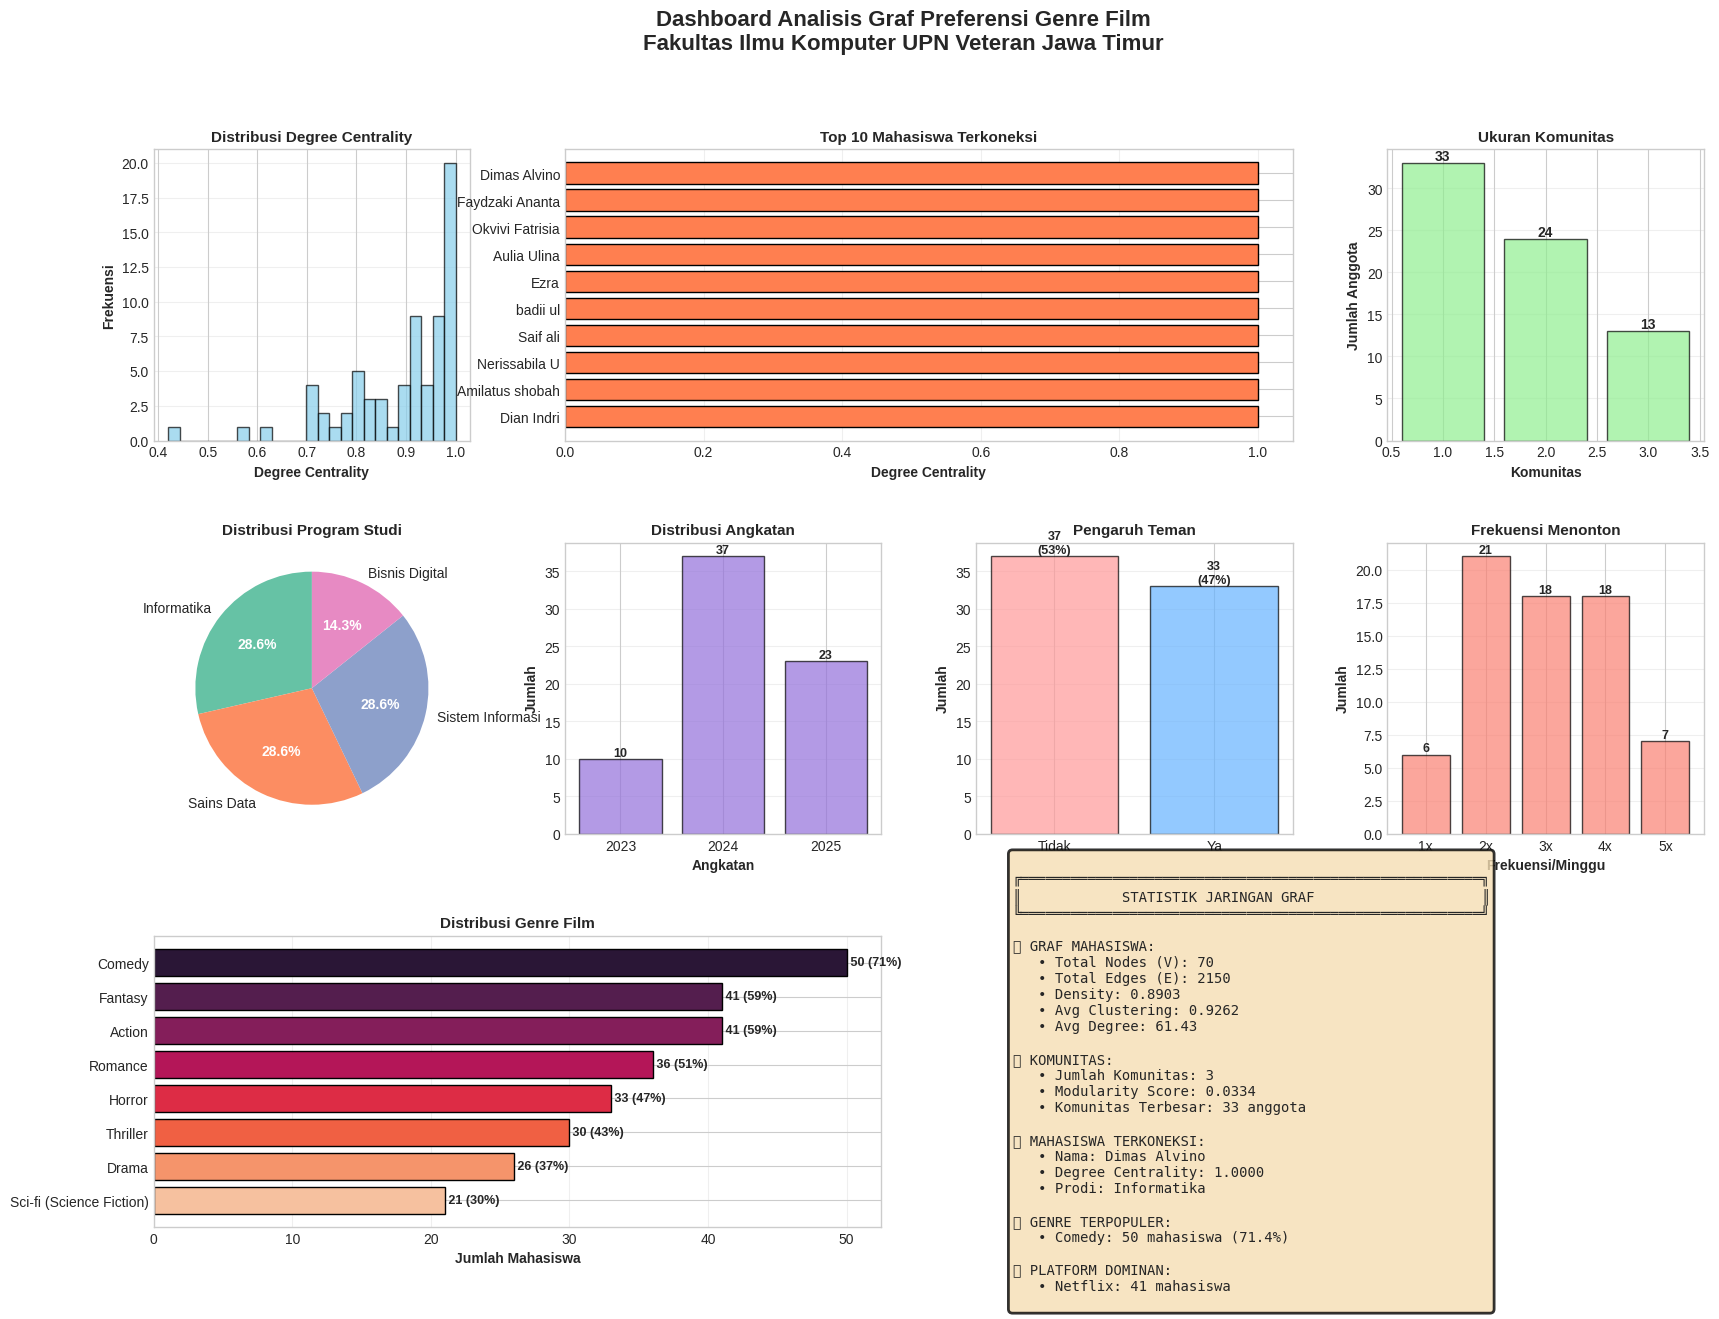

In [ ]:
# ================================================================================
# 10. DASHBOARD SUMMARY
# ================================================================================

print("\n" + "="*80)
print("TAHAP 10: DASHBOARD SUMMARY")
print("="*80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, hspace=0.35, wspace=0.3)

# 1. Distribusi Degree Centrality
ax1 = fig.add_subplot(gs[0, 0])
degree_values = list(degree_centrality.values())
ax1.hist(degree_values, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Degree Centrality', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frekuensi', fontsize=10, fontweight='bold')
ax1.set_title('Distribusi Degree Centrality', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Top 10 Mahasiswa Terkoneksi
ax2 = fig.add_subplot(gs[0, 1:3])
top_10 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
names_short = [x[0].split()[0] + ' ' + x[0].split()[1] if len(x[0].split()) > 1 else x[0] for x in top_10]
values = [x[1] for x in top_10]
bars = ax2.barh(names_short, values, color='coral', edgecolor='black')
ax2.set_xlabel('Degree Centrality', fontsize=10, fontweight='bold')
ax2.set_title('Top 10 Mahasiswa Terkoneksi', fontsize=11, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# 3. Ukuran Komunitas
ax3 = fig.add_subplot(gs[0, 3])
community_sizes = [len(comm) for comm in communities]
ax3.bar(range(1, len(communities)+1), community_sizes, color='lightgreen',
        edgecolor='black', alpha=0.7)
for i, v in enumerate(community_sizes):
    ax3.text(i+1, v, str(v), ha='center', va='bottom', fontweight='bold')
ax3.set_xlabel('Komunitas', fontsize=10, fontweight='bold')
ax3.set_ylabel('Jumlah Anggota', fontsize=10, fontweight='bold')
ax3.set_title('Ukuran Komunitas', fontsize=11, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Program Studi
ax4 = fig.add_subplot(gs[1, 0])
prodi_counts = df['Program Studi'].value_counts()
colors_prodi = sns.color_palette("Set2", len(prodi_counts))
wedges, texts, autotexts = ax4.pie(prodi_counts.values, labels=prodi_counts.index,
                                    autopct='%1.1f%%', colors=colors_prodi, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax4.set_title('Distribusi Program Studi', fontsize=11, fontweight='bold')

# 5. Angkatan
ax5 = fig.add_subplot(gs[1, 1])
angkatan_counts = df['Angkatan'].value_counts().sort_index()
ax5.bar(angkatan_counts.index.astype(str), angkatan_counts.values,
        color='mediumpurple', edgecolor='black', alpha=0.7)
for i, v in enumerate(angkatan_counts.values):
    ax5.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)
ax5.set_xlabel('Angkatan', fontsize=10, fontweight='bold')
ax5.set_ylabel('Jumlah', fontsize=10, fontweight='bold')
ax5.set_title('Distribusi Angkatan', fontsize=11, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 6. Pengaruh Teman
ax6 = fig.add_subplot(gs[1, 2])
influence_counts = df['Apakah preferensi film anda dipengaruhi teman?'].value_counts()
colors_inf = ['#ff9999', '#66b3ff']
bars = ax6.bar(influence_counts.index, influence_counts.values, color=colors_inf,
               edgecolor='black', alpha=0.7)
for i, v in enumerate(influence_counts.values):
    ax6.text(i, v, f'{v}\n({v/len(df)*100:.0f}%)', ha='center', va='bottom', fontweight='bold', fontsize=9)
ax6.set_ylabel('Jumlah', fontsize=10, fontweight='bold')
ax6.set_title('Pengaruh Teman', fontsize=11, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# 7. Frekuensi Menonton
ax7 = fig.add_subplot(gs[1, 3])
freq = df['Seberapa sering anda menonton film dalam 1 minggu?'].value_counts().sort_index()
ax7.bar([str(x)+'x' for x in freq.index], freq.values, color='salmon', edgecolor='black', alpha=0.7)
for i, v in enumerate(freq.values):
    ax7.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)
ax7.set_xlabel('Frekuensi/Minggu', fontsize=10, fontweight='bold')
ax7.set_ylabel('Jumlah', fontsize=10, fontweight='bold')
ax7.set_title('Frekuensi Menonton', fontsize=11, fontweight='bold')
ax7.grid(axis='y', alpha=0.3)

# 8. Top Genre
ax8 = fig.add_subplot(gs[2, :2])
top_genres = genre_counts.most_common(8)
genre_names = [g[0] for g in top_genres]
genre_vals = [g[1] for g in top_genres]
colors_genre = sns.color_palette("rocket", len(genre_names))
bars = ax8.barh(genre_names, genre_vals, color=colors_genre, edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax8.text(width, bar.get_y() + bar.get_height()/2,
             f' {int(width)} ({genre_vals[i]/len(df)*100:.0f}%)',
             ha='left', va='center', fontweight='bold', fontsize=9)
ax8.set_xlabel('Jumlah Mahasiswa', fontsize=10, fontweight='bold')
ax8.set_title('Distribusi Genre Film', fontsize=11, fontweight='bold')
ax8.invert_yaxis()
ax8.grid(axis='x', alpha=0.3)

# 9. Statistik Jaringan
ax9 = fig.add_subplot(gs[2, 2:])
ax9.axis('off')

avg_degree = sum(dict(G_mahasiswa.degree()).values())/G_mahasiswa.number_of_nodes()
top_mhs = sorted_degree[0]

stats_text = f"""
╔═══════════════════════════════════════════════════════╗
║            STATISTIK JARINGAN GRAF                    ║
╚═══════════════════════════════════════════════════════╝

📊 GRAF MAHASISWA:
   • Total Nodes (V): {G_mahasiswa.number_of_nodes()}
   • Total Edges (E): {G_mahasiswa.number_of_edges()}
   • Density: {nx.density(G_mahasiswa):.4f}
   • Avg Clustering: {avg_clustering:.4f}
   • Avg Degree: {avg_degree:.2f}

👥 KOMUNITAS:
   • Jumlah Komunitas: {len(communities)}
   • Modularity Score: {modularity:.4f}
   • Komunitas Terbesar: {max(community_sizes)} anggota

🎯 MAHASISWA TERKONEKSI:
   • Nama: {top_mhs[0].split()[0]} {top_mhs[0].split()[1] if len(top_mhs[0].split()) > 1 else ''}
   • Degree Centrality: {top_mhs[1]:.4f}
   • Prodi: {G_mahasiswa.nodes[top_mhs[0]]['prodi']}

🎭 GENRE TERPOPULER:
   • {top_genres[0][0]}: {top_genres[0][1]} mahasiswa ({top_genres[0][1]/len(df)*100:.1f}%)

📱 PLATFORM DOMINAN:
   • {platform_dist.index[0]}: {platform_dist.values[0]} mahasiswa
"""

ax9.text(0.05, 0.5, stats_text, fontsize=10, verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, edgecolor='black', linewidth=2))

fig.suptitle('Dashboard Analisis Graf Preferensi Genre Film\nFakultas Ilmu Komputer UPN Veteran Jawa Timur',
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('05_dashboard_summary.png', bbox_inches='tight', facecolor='white')
plt.show()

**TAHAP 10: DASHBOARD SUMMARY**

Dashboard summary merangkum seluruh hasil analisis dalam satu tampilan komprehensif: mulai dari statistik degree centrality (mayoritas DC 1.0/tidak ada mahasiswa yang terisolasi), komposisi prodi yang imbang, hingga distribusi preferensi genre (Comedy, Fantasy, Action mendominasi). Statistik jaringan menunjukkan jaringan nyaris lengkap, dengan 70 simpul dan 2150 sisi serta density tinggi (0.8903) artinya, relasi preferensi genre benar-benar merata di antara mahasiswa.

Fitur lain menampilkan platform streaming favorit (mayoritas Netflix), serta peta distribusi komunitas yang memperlihatkan komunitas terbesar berisi 33 mahasiswa. Secara keseluruhan, dashboard ini berfungsi sebagai gambaran umum seluruh pola relasi dan preferensi, sekaligus menjadi alat bantu visual untuk pengambilan keputusan atau kajian lebih lanjut.